## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_csv = 'data/scraped_data.csv'


### Cleaning up table data

In [2]:
df = pd.read_csv(data_csv)
raw_df = df # in case this is needed for lookups

# ToDo: Maybe convert into methods to tidy up this section

# Remove duplidate rows
df = df.drop_duplicates()

# Drop some not very useful columns
df = df.drop('property_id', 1)
df = df.drop('environment', 1)
df = df.drop('page_name', 1)
df = df.drop('platform', 1)
df = df.drop('property_category', 1)
df = df.drop('seller_name', 1) # we have seller_id
df = df.drop('published_date', 1) # removing for now, since timespan is only a week
df = df.drop('facility', 1) # this has been split up into individual fiels
df = df.drop('property_type', 1)  # property_type seems to always be apartment print(df.loc[df['property_type'] != 'apartment'])
df = df.drop('lease_units', 1) # lease_units seems to always be months  print(df.loc[df['lease_units'] != 'months'])
df = df.drop('county', 1) # county seems to always be Dublin   print(df.loc[df['county'] != 'Dublin'])
df = df.drop('currency', 1) # currency seems to always be €   print(df.loc[df['county'] != '€'])
df = df.drop('longitude', 1) # doesn't seem to correlate much with price
df = df.drop('latitude', 1) # doesn't seem to correlate much with price


areas = set(df['area'])
print(areas)
areas_dict = {x:float(i) for i,x in enumerate(areas)}
df['area'] = df['area'].map(areas_dict)

# Remove superexpensive exceptions
df = df.loc[df['price'] < 4300]
df = df.loc[df['price'] >= 500]

# Replace 'seller_type' values with numbers
df['seller_type'] = df['seller_type'].map({'agent': 1.0, 'private': 0.0})

# Replace 'furnished' values with numbers
df['furnished'] = df['furnished'].map({'yes': 1.0, 'no': 0.0, 'either': 3.0})

# Replace 'open_viewing' values with numbers
df['open_viewing'] = df['open_viewing'].map({'yes': 1.0, 'no': 0.0})

# Convert int values to floats
df['no_of_photos'] = df['no_of_photos'].astype(float)
df['available_for'] = df['available_for'].astype(float)
df['price'] = df['price'].astype(float)
df['beds'] = df['beds'].astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)

# Replace True values with 1, False and NaN with 0
df = df.replace({True:1.0}).replace({False:0.0}).fillna(0.0)

# ToDo: available_from might be interesting after calculating timespan from ad date to available date?

print(df.info())
df.head()

{'Temple Bar', 'Royal Canal Park', 'Sandyford', 'Sandycove', 'Swords', 'Coolmine', 'Drumcondra', 'Finglas', 'Glenageary', 'Clonskeagh', 'Carrickmines', 'North Wall', 'Islandbridge', 'Ranelagh', 'Palmerstown', 'Mount Merrion', 'Dun Laoghaire', 'Ringsend', 'Donnybrook', 'Dublin 8', 'Glasnevin', 'Portmarnock', 'Booterstown', 'Killester', 'Monkstown', 'Dundrum', 'Clontarf', 'Rathcoole', 'Saggart', 'Donabate', 'Citywest', 'Bluebell', 'Lucan', 'Cabinteely', 'East Wall', 'Perrystown', 'Dublin 7', 'Leopardstown', 'North Circular Road', 'Clarehall', 'Fairview', 'Ballybough', 'Whitehall', 'Skerries', 'Ballsbridge', 'Dalkey', 'Inchicore', 'Ballycullen', 'Ongar', 'Goatstown', 'Sutton', 'Loughlinstown', 'Kilmainham', 'Ard Na Greine', 'Foxrock', 'Balgriffin', 'Tyrrelstown', 'Rathmichael', 'Balbriggan', 'Ward', 'Kiltipper', "Harold's Cross", 'Dartry', 'Blanchardstown', 'Blackrock', 'Ballymun', 'Sandymount', 'Navan Road (D7)', 'Rathgar', 'Tallaght', 'Cabra', 'Merrion', 'Milltown', 'Grand Canal Dock', 

,property_title,seller_id,seller_type,open_viewing,no_of_photos,available_from,available_for,area,furnished,bathrooms,...,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet,property_description
0,"1 BED, Tallaght Cross West, Tallaght, Dublin 24",9871.0,1.0,0.0,3.0,2017-10-01,12.0,69.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,*** UNFURNISHED*** Irish Residential Propert...
1,"1 Palace Street, Dublin 2, Dublin 2",7549.0,1.0,0.0,6.0,2017-09-15,12.0,101.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,***** HERBERT PROPERTY SERVICES****are delight...
2,"10 Clarinda House, Clarinda Park West, Dun Lao...",0.0,0.0,0.0,8.0,2017-09-18,6.0,16.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,Rating to be updated (new windows to be delive...
3,"10 Gandon Hall, Gardners Street, Dublin 1, Du...",0.0,0.0,0.0,5.0,2017-10-06,0.0,95.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,SHORT TERM OR LONG TERM LETTING-A renovated on...
4,"10 The Clayton, The Gasworks, Barrow Street, D...",0.0,0.0,0.0,7.0,2017-11-10,12.0,122.0,1.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,"CLAYTON, THE GASWORKS, BARROW STREET, DUBLIN 4..."


In [3]:
print ("Dimension of train data {}".format(df.shape))

Dimension of train data (1337, 28)


In [4]:
df.describe()

,seller_id,seller_type,open_viewing,no_of_photos,available_for,area,furnished,bathrooms,beds,price,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,...,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,3370.798055,0.662678,0.013463,10.679132,9.482423,64.754675,1.046372,1.466717,1.804787,2034.682872,...,0.854899,0.196709,0.013463,0.089005,0.780105,0.762902,0.012715,0.536275,0.225131,0.541511
std,4025.248258,0.472973,0.115289,7.049512,4.880905,35.965110,0.440404,0.632674,1.400398,733.467859,...,0.352334,0.397659,0.115289,0.284858,0.414330,0.425462,0.112084,0.498869,0.417825,0.498460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.000000,9.000000,32.000000,1.000000,1.000000,1.000000,1500.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,577.000000,1.000000,0.000000,9.000000,12.000000,73.000000,1.000000,1.000000,2.000000,1800.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,7700.000000,1.000000,0.000000,13.000000,12.000000,95.000000,1.000000,2.000000,2.000000,2495.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,10948.000000,1.000000,1.000000,58.000000,36.000000,123.000000,3.000000,12.000000,47.000000,4239.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(df.columns.values)

['property_title' 'seller_id' 'seller_type' 'open_viewing' 'no_of_photos'
 'available_from' 'available_for' 'area' 'furnished' 'bathrooms' 'beds'
 'price_frequency' 'price' 'Parking' 'Cable Television' 'Dryer'
 'Garden / Patio / Balcony' 'Washing Machine' 'Serviced Property'
 'Pets Allowed' 'Wheelchair Access' 'Central Heating' 'Microwave' 'Smoking'
 'Dishwasher' 'House Alarm' 'Internet' 'property_description']


### Splitting into Weekly and Monthly Priced Dataframes

In [6]:
df_weekly_rates = df.loc[df['price_frequency'] == 'weekly']
df_weekly_rates = df_weekly_rates.drop('price_frequency', 1)
print(df_weekly_rates.shape)

df_monthly_rates = df.loc[df['price_frequency'] == 'monthly']
df_monthly_rates = df_monthly_rates.drop('price_frequency', 1)

# There seems to be an ad with 47 beds for 750/months. removing this
df_monthly_rates = df_monthly_rates[df_monthly_rates.beds < 20]
print(df_monthly_rates.shape)

(182, 27)
(1154, 27)


# Continuing with only monthly priced data for now

## Investigate text in 'propery_description' column

In [69]:
desc_text = df_monthly_rates['property_description']
# print(desc_text[0])
# Remove special characters
desc_text_clean = desc_text.str.replace("[-&().,!*//-?;]"," ").str.lower()

from collections import Counter   
wordlist = []
for row in desc_text_clean:
    wordlist += row.split()

wordcount = Counter(wordlist)

print(wordcount)

Counter({'the': 6198, 'and': 5751, 'to': 3749, 'a': 3524, 'with': 3086, 'is': 2899, 'of': 2813, 'in': 2189, 'apartment': 2072, 'this': 1496, 'bedroom': 1346, 'property': 1063, 'kitchen': 1044, 'large': 1023, 'double': 950, 'on': 947, 'are': 923, 'centre': 915, 'room': 910, 'bathroom': 868, 'living': 832, 'city': 781, 'area': 781, 'from': 756, 'parking': 744, 'for': 742, 'two': 725, 'all': 709, 'located': 704, 'floor': 685, 'fully': 679, 'available': 678, 'spacious': 645, 'dublin': 613, 'one': 612, 'has': 601, 'fitted': 584, 'by': 578, 'walk': 573, 'bedrooms': 565, 'within': 550, 'email': 540, 'only': 537, 'development': 535, 'viewing': 532, 'location': 511, 'm': 508, 'an': 499, 'dining': 492, 'balcony': 481, 'please': 478, 'there': 475, 'also': 460, 'storage': 447, 'well': 439, 'close': 430, 'amenities': 429, 'luas': 423, 'accommodation': 415, 'access': 413, 'minutes': 413, 'entrance': 413, 'park': 410, 'very': 407, 'as': 393, 'your': 389, 'bed': 388, 'bus': 382, 'space': 375, 'new': 3

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
desc_vect = vectorizer.fit_transform(desc_text_clean)
vocab = vectorizer.get_feature_names() 
print("Unique words: " + str(len(vocab)))


Unique words: 4711


### Ad Description Word Cloud

66931


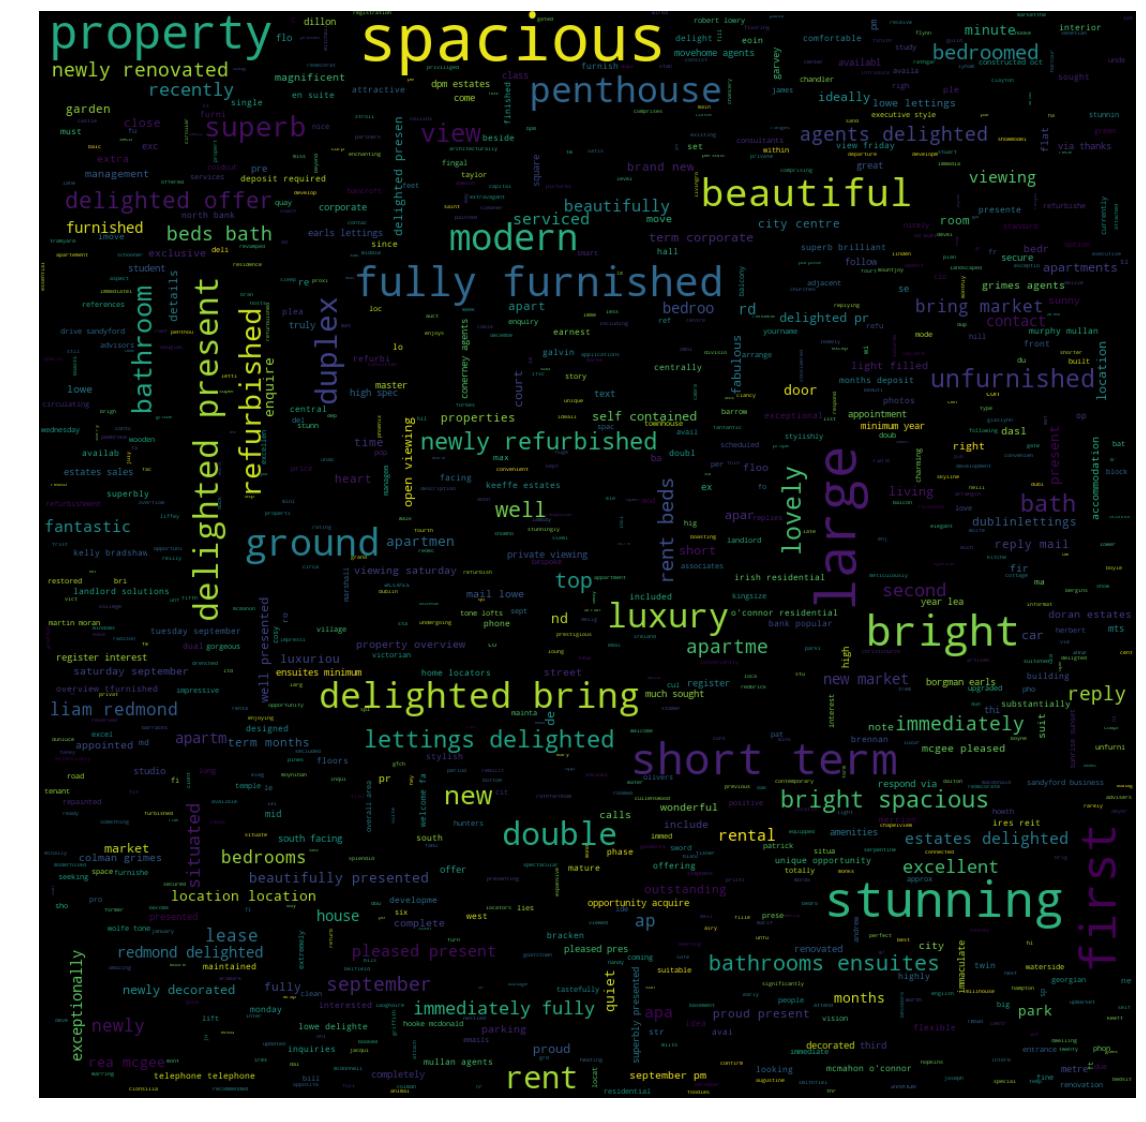

In [97]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

stopwords = set(STOPWORDS)
add_stopwords = ["st","th","ray","cooke","also","savills","located","sq","dng","estate","agent","redmont","smith","butler","sherry","fitzgerald","gillespie","auctioneers","one","two","three","month","email","october","november", "apt","available", "call", "enquiries","please","apartment","dublin","bedroom","now","floor","bed","let","letting","will"]
for sw in add_stopwords:
    stopwords.add(sw)
    
square_mask = np.array(Image.open("square.jpg"))
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=60, max_words=66931, mask=square_mask, stopwords=stopwords) \
    .generate(desc_text_clean.to_string())
print(len(desc_text_clean.to_string()))
wordcloud.to_file("square1.jpg")   
# Display the generated image the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams["figure.figsize"] = [20,20]
plt.figure()
plt.show()


#### Price per area scatterplot

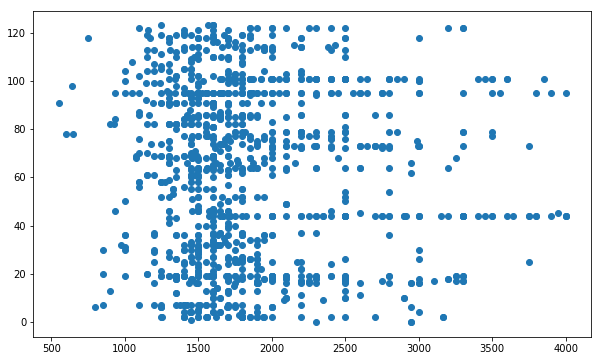

In [98]:
x = df_monthly_rates['price']
y = df_monthly_rates['area']
plt.rcParams["figure.figsize"] = [10,6]
plt.figure()
plt.scatter(x, y)
plt.show()

#### Histograms

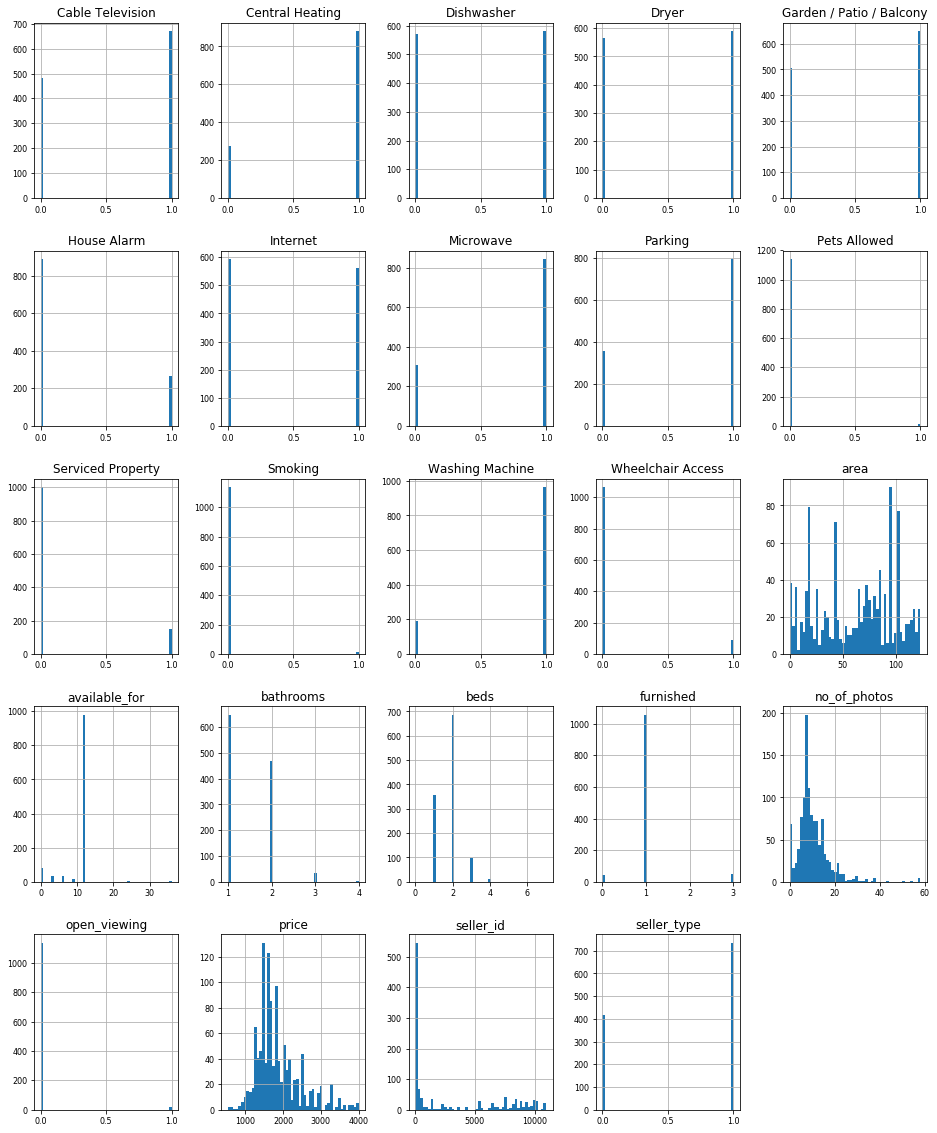

In [75]:
df_monthly_rates.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Correlations

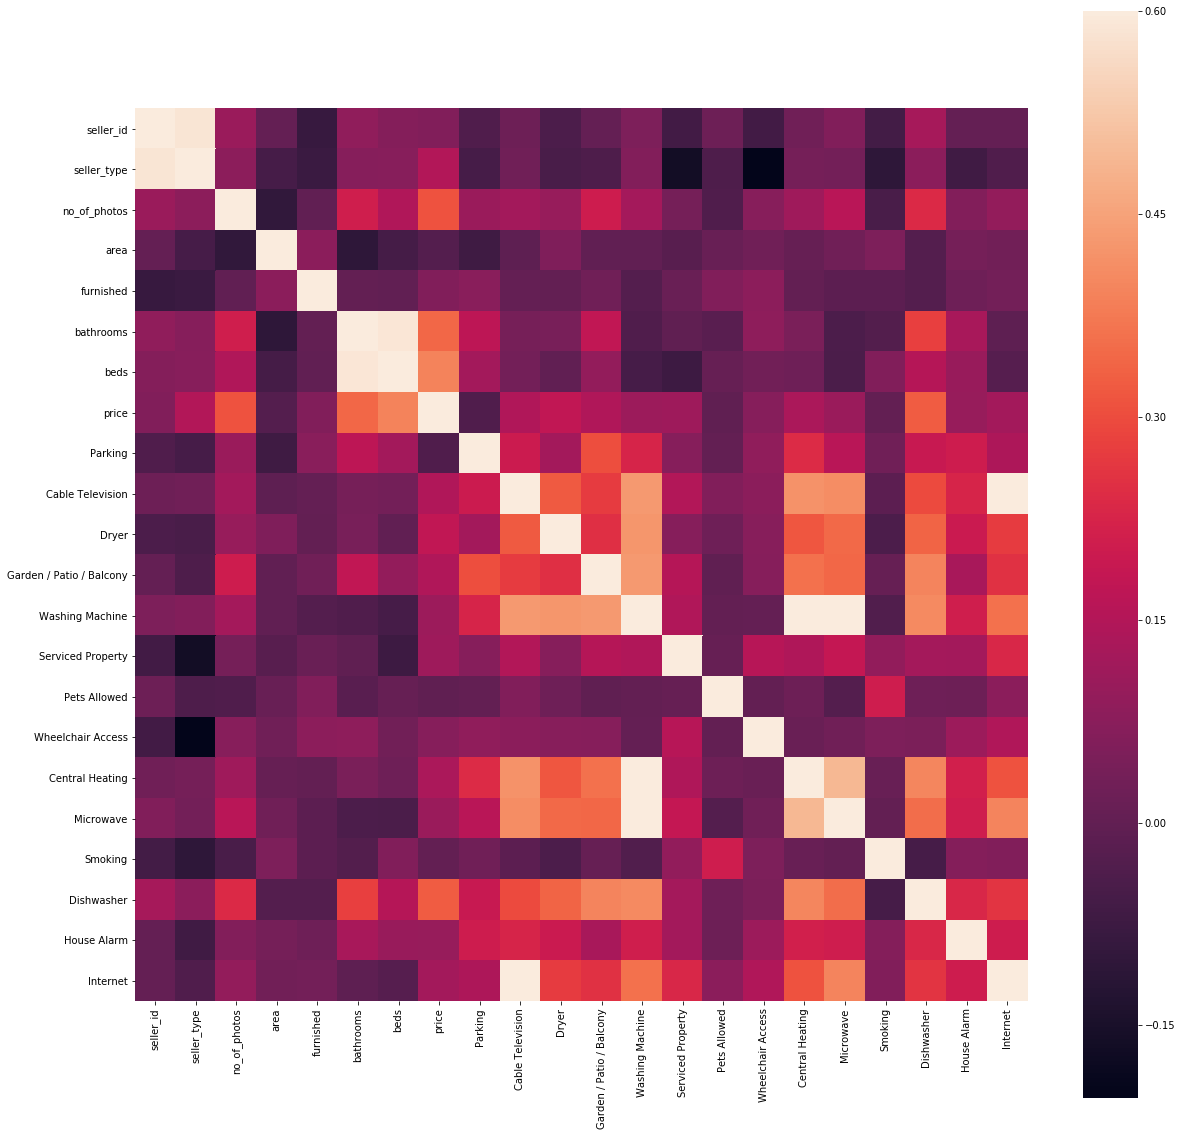

In [76]:
#correlation matrix
corrmat = df_monthly_rates.drop('available_for', 1).drop('open_viewing', 1).corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.6, square=True);

# plt.figure(figsize=(10,10))
# foo = sns.heatmap(corrmat.corr(), vmax=0.8, square=True, annot=True)

Features that correlate most with the monthly rent price are number of no_of_photos, beds and bathrooms, as well as 'dishwasher'...

In [77]:
df_monthly_rates['price'].describe()

count    1154.000000
mean     1869.880416
std       587.528325
min       550.000000
25%      1500.000000
50%      1700.000000
75%      2100.000000
max      4000.000000
Name: price, dtype: float64

#### Show price distibution for number of beds

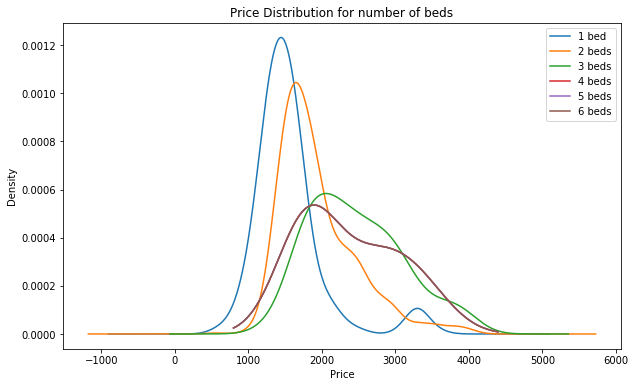

In [78]:
df_monthly_rates.price[(df_monthly_rates.beds == 1.0)].plot(kind='kde', label='1 bed')    
df_monthly_rates.price[(df_monthly_rates.beds == 2.0)].plot(kind='kde', label='2 beds')      
df_monthly_rates.price[(df_monthly_rates.beds == 3.0)].plot(kind='kde', label='3 beds')      
df_monthly_rates.price[(df_monthly_rates.beds == 4.0)].plot(kind='kde', label='4 beds') 
df_monthly_rates.price[(df_monthly_rates.beds == 4.0)].plot(kind='kde', label='5 beds')    
df_monthly_rates.price[(df_monthly_rates.beds == 4.0)].plot(kind='kde', label='6 beds') 

plt.xlabel("Price")    
plt.title("Price Distribution for number of beds")

plt.legend()

#### Showing price distribution for the most common areas

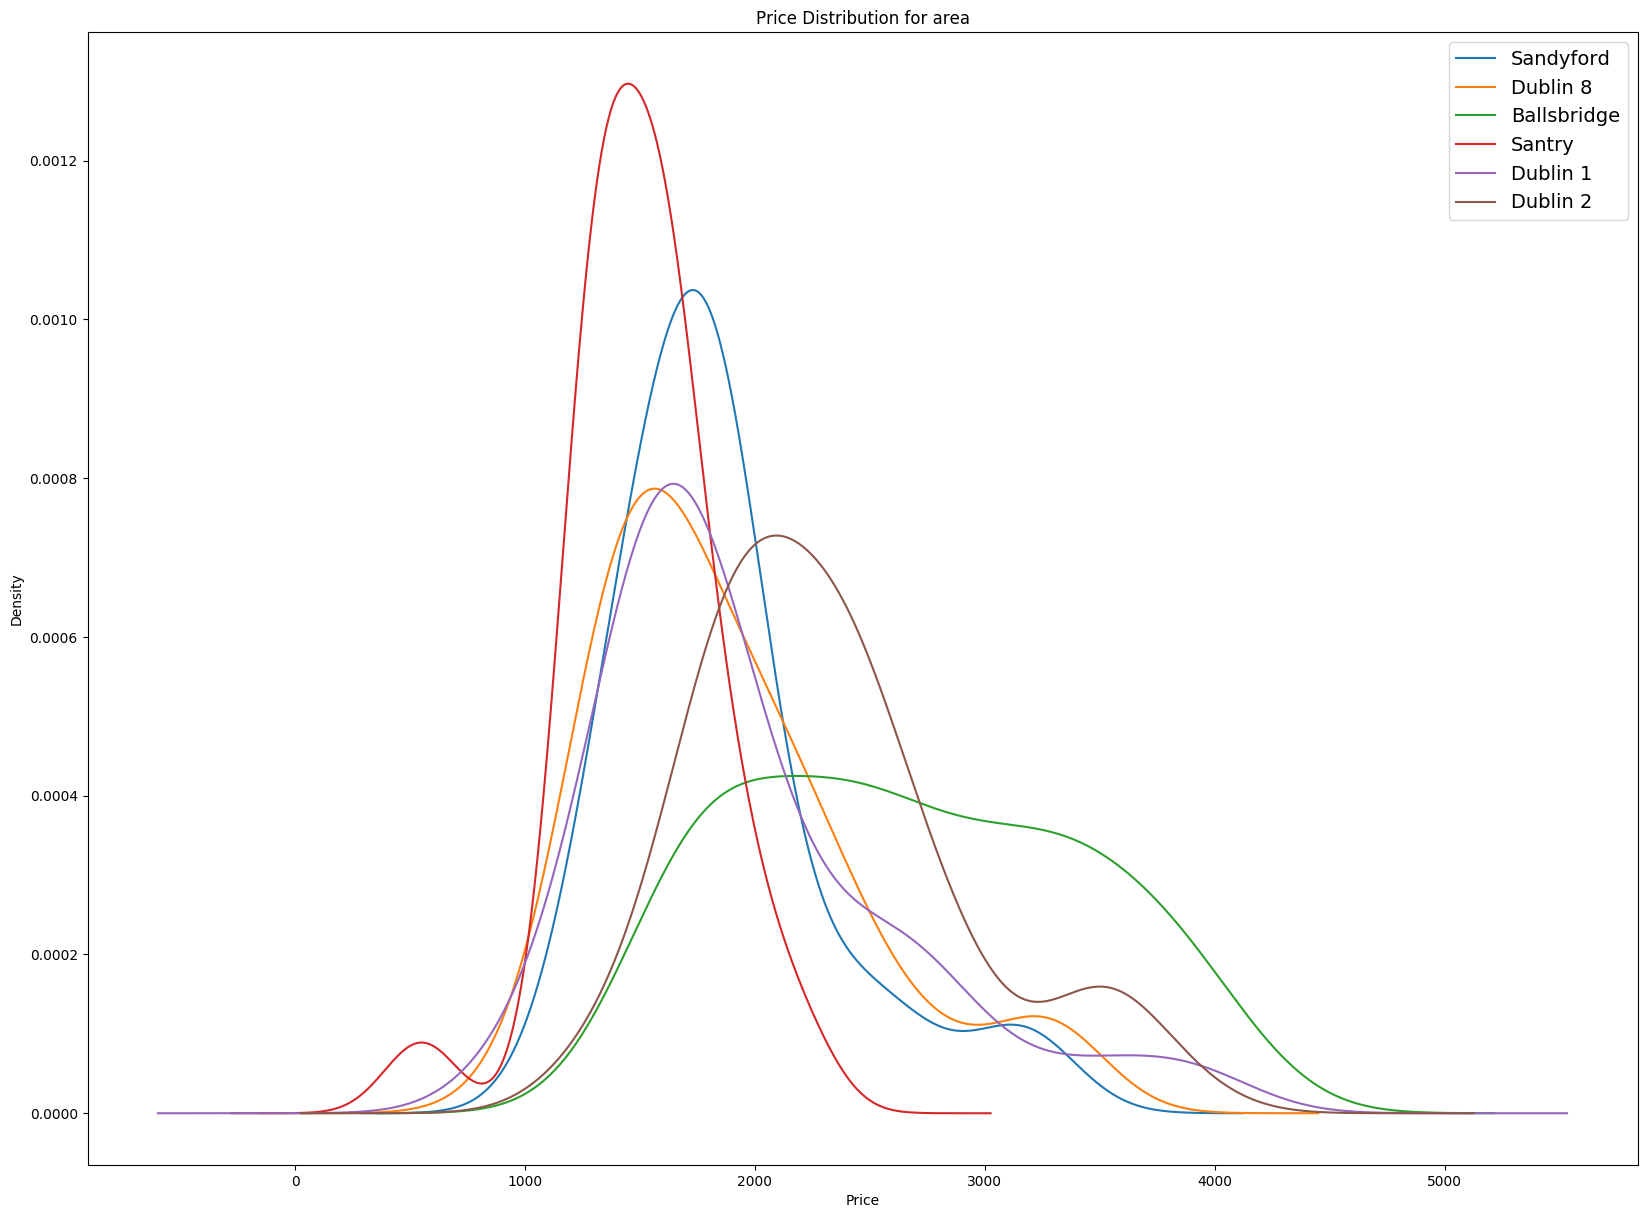

In [79]:
fig = plt.figure(figsize=(20, 15), dpi=100)
for key, value in areas_dict.items():
    count = len(df_monthly_rates.price[(df_monthly_rates.area == value)])
    if count > 25:
        df_monthly_rates.price[(df_monthly_rates.area == value)].plot(kind='kde', label=key )
        
plt.xlabel("Price")    
plt.title("Price Distribution for area")
plt.legend(prop={'size': 14})

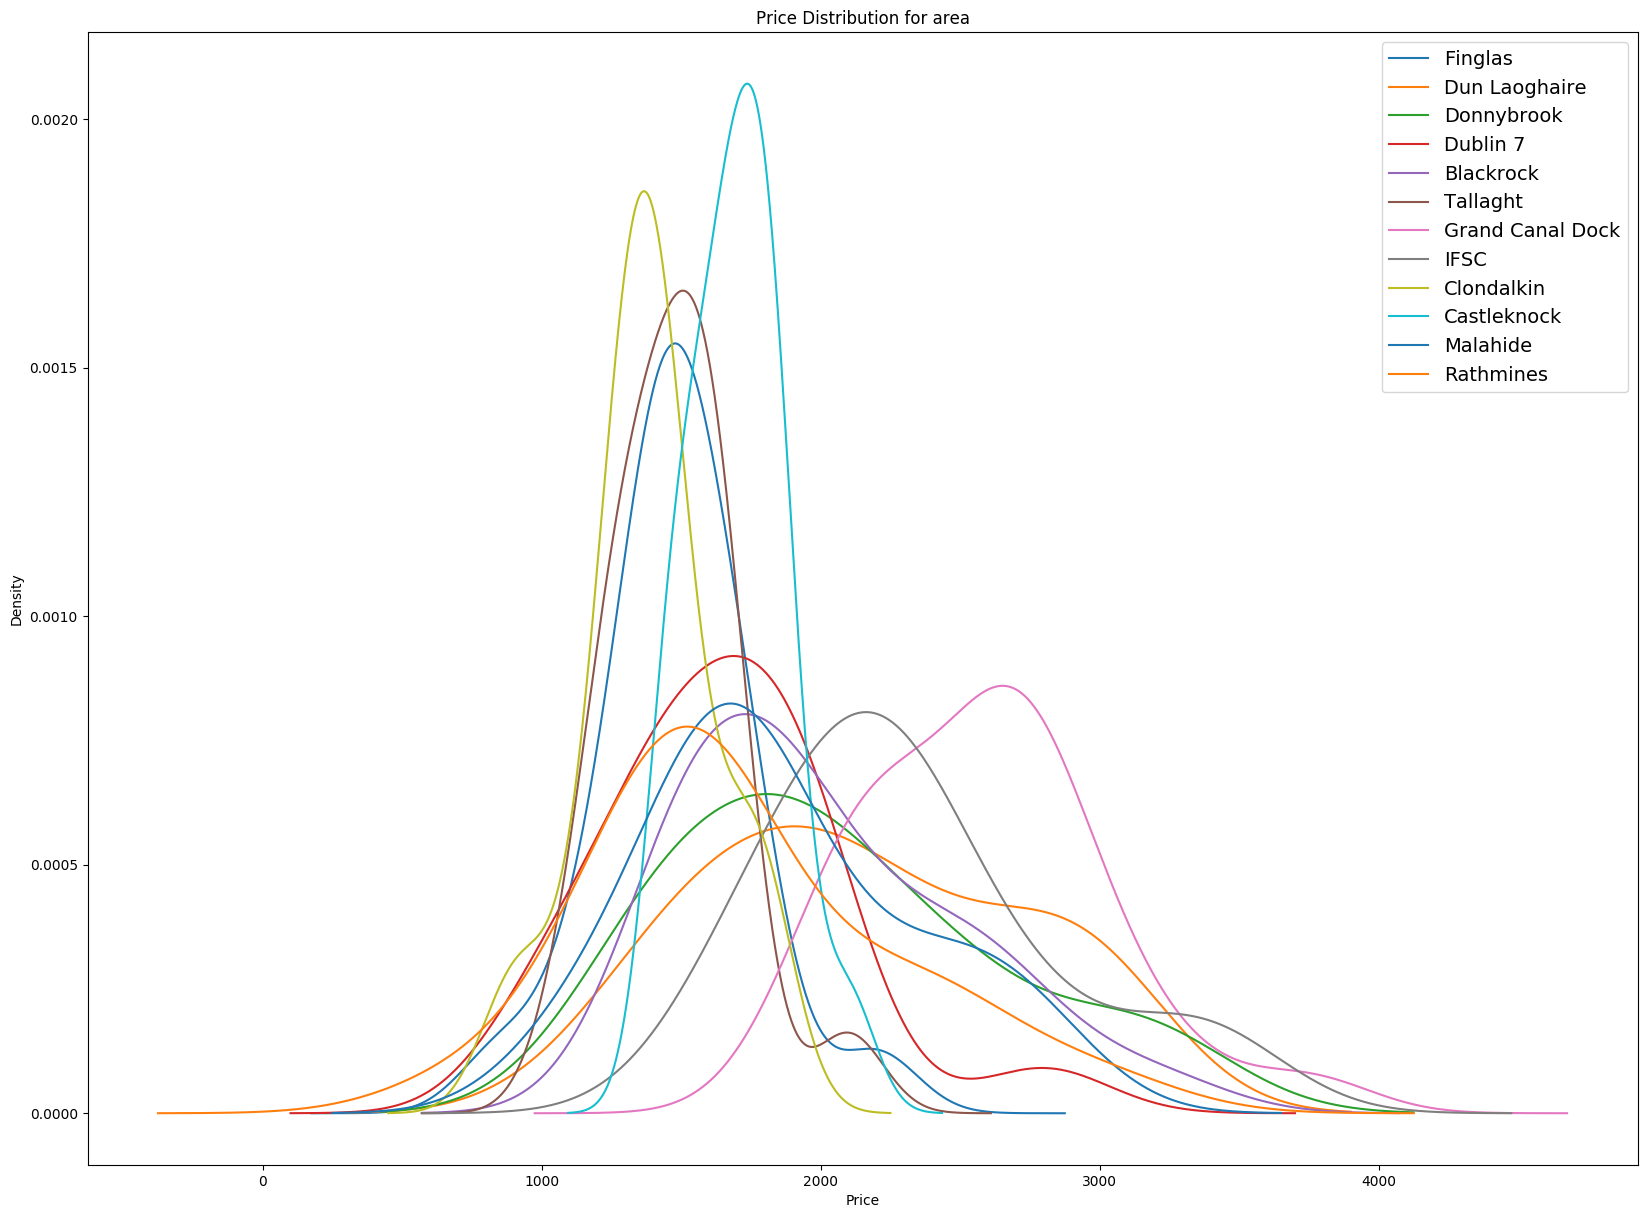

In [80]:
fig = plt.figure(figsize=(20, 15), dpi=100)
for key, value in areas_dict.items():
    count = len(df_monthly_rates.price[(df_monthly_rates.area == value)])
    if (count > 17) & (count <= 25 ):
        df_monthly_rates.price[(df_monthly_rates.area == value)].plot(kind='kde', label=key )
        
plt.xlabel("Price")    
plt.title("Price Distribution for area")
plt.legend(prop={'size': 14})

### Save monthly wrangled data as CSV

In [81]:
df_monthly_rates.to_csv('data/cleaned_monthly.csv')